In [29]:
import mysql.connector
from mysql.connector import Error
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

### Criando conexão Inicial com o Banco de Dados

In [2]:
def create_server_connection(host_name, user_name, user_password):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

### Verificando conexão com o server

In [3]:
connection = create_server_connection("localhost", "root", "259604")

MySQL Database connection successful


### Criando conexão com o Banco de Dados

In [4]:
def create_db_connection(host_name, user_name, user_password, db_name):
    connection = None
    try:
        connection = mysql.connector.connect(
            host=host_name,
            user=user_name,
            passwd=user_password,
            database=db_name
        )
        print("MySQL Database connection successful")
    except Error as err:
        print(f"Error: '{err}'")

    return connection

### Função que executa as consultas

In [6]:
def execute_query(connection, query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Query successful")
    except Error as err:
        print(f"Error: '{err}'")

### Função para ler os dados

In [7]:
def read_query(connection, query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print(f"Error: '{err}'")

In [13]:
dadosEstudantes = []
colunas = ["Matrículas", "Status", "Estudante", "Disciplina"]

### Query de Consulta

In [16]:
q1 = """
select distinct Matriculas, Status, IDEstudante, IDDisciplina from(
	select distinct * from student_data.dados 
	inner join student_data.fluxos on
	student_data.dados.IDFluxo =  student_data.fluxos.Fluxo where Abrev = "AEROESPACIAL") igualarFluxo where Status = 1;
"""

connection = create_db_connection("localhost", "root", "259604", "student_data")
results = read_query(connection, q1)

for result in results:
  dadosEstudantes.append(result)

MySQL Database connection successful


### Criando pandas para análise

In [19]:
previsao = pd.DataFrame(dadosEstudantes, columns = colunas)

previsao.head()

,Matrículas,Status,Estudante,Disciplina
0,2,1,27990,CIC0007
1,1,1,27990,ENM0068
2,1,1,27990,ENM0071
3,1,1,27990,FGA0008
4,2,1,27990,FGA0009


### Definindo variáveis 

In [24]:
matriculas = previsao['Matrículas'].values
status = previsao['Status'].values

print(matriculas)
print(status)

[2 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]


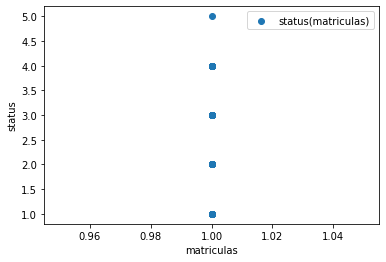

In [27]:
plt.scatter(status,matriculas,label='status(matriculas)');
plt.xlabel('matriculas');
plt.ylabel('status');
plt.legend();

In [30]:
modelo = sm.OLS(status, matriculas)

In [31]:
resultado = modelo.fit()

In [32]:
print(resultado.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.861
Model:                            OLS   Adj. R-squared (uncentered):              0.861
Method:                 Least Squares   F-statistic:                          1.777e+04
Date:                Tue, 28 Jun 2022   Prob (F-statistic):                        0.00
Time:                        22:46:41   Log-Likelihood:                         -1237.5
No. Observations:                2866   AIC:                                      2477.
Df Residuals:                    2865   BIC:                                      2483.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Coeficiente de interceção

In [33]:
matriculas = sm.add_constant(matriculas)

In [34]:
modelo2 = sm.OLS(status, matriculas)

In [35]:
resultado2 = modelo2.fit()

In [36]:
print(resultado2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                        -inf
Model:                            OLS   Adj. R-squared:                   -inf
Method:                 Least Squares   F-statistic:                    -2864.
Date:                Tue, 28 Jun 2022   Prob (F-statistic):               1.00
Time:                        22:48:03   Log-Likelihood:                 88318.
No. Observations:                2866   AIC:                        -1.766e+05
Df Residuals:                    2864   BIC:                        -1.766e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0000   5.02e-16   1.99e+15      0.0

d:\Leticia\Documentos\UnB\EPS\Tutoriais\env\lib\site-packages\statsmodels\regression\linear_model.py:1736: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [37]:
coef_linear, coef_angular = resultado2.params

In [38]:
reta = coef_angular*matriculas+coef_linear

In [39]:
print(len(matriculas.shape))
print(reta)

2
[[1. 1.]
 [1. 1.]
 [1. 1.]
 ...
 [1. 1.]
 [1. 1.]
 [1. 1.]]
